# Logistische Regression

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

os.getcwd()
%cd "C:\Users\Dennis\OneDrive\Dokumente\03_Master BAOR\05_Kurse\01_Business Analytics\04_Data Analytics Challenge"

ccdata = pd.read_csv('creditcard.csv')

C:\Users\Dennis\OneDrive\Dokumente\03_Master BAOR\05_Kurse\01_Business Analytics\04_Data Analytics Challenge


In [5]:
# Small dataset
#ccdata = ccdata.iloc[:100000, :]

# Balance of dataset target values
display(ccdata.Class.value_counts())

# Drop feature 'Time'
ccdata.drop('Time', axis=1, inplace=True)

# Scaling feature 'Amount'
standard_scaler = StandardScaler()
ccdata['Amount'] = standard_scaler.fit_transform(ccdata[['Amount']])
ccdata.head(3)

0    284315
1       492
Name: Class, dtype: int64

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0


In [6]:
X = ccdata.iloc[:, :-1].to_numpy()
y = ccdata.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, random_state=1, stratify=ccdata['Class'], shuffle=True)

print('{}\n'.format(Counter(y_train)))
print('Ratio of target value 1 in ccdata: {:.2f} %'.format(100*np.sum(ccdata['Class'] == 1)/len(ccdata['Class'])))
print('Ratio of target value 1 in train_set: {:.2f} %'.format(100*np.sum(y_train == 1)/len(y_train)))
print('Ratio of target value 1 in test_set: {:.2f} %'.format(100*np.sum(y_test == 1)/len(y_test)))

Counter({0: 270099, 1: 467})

Ratio of target value 1 in ccdata: 0.17 %
Ratio of target value 1 in train_set: 0.17 %
Ratio of target value 1 in test_set: 0.18 %


In [7]:
# Smote the dataset until its balanced
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
X_res, y_res = smote.fit_resample(X_train, y_train)
Counter(y_res)

Counter({0: 270099, 1: 270099})

### Auccuracy

In [8]:
from sklearn.linear_model import LogisticRegression

# Train two Logistic Regression models without and with SMOTE
# logreg = LogisticRegression(penalty=None)
# logreg_sm = LogisticRegression(penalty=None)
logreg = LogisticRegression(penalty='l2', C=1)
logreg_sm = LogisticRegression(penalty='l2', C=1)

logreg.fit(X_train, y_train)
logreg_sm.fit(X_res, y_res)

# Calculate the mean accuracy of both models on train and test set
print('Accuracy on train_set imbalanced dataset: {}'.format(logreg.score(X_train, y_train)))
print('Accuracy on test_set imbalanced dataset: {}\n'.format(logreg.score(X_test, y_test)))

print('Accuracy on train_set smoted dataset: {}'.format(logreg_sm.score(X_res, y_res)))
print('Accuracy on test_set smoted dataset: {}'.format(logreg_sm.score(X_test, y_test)))

Accuracy on train_set imbalanced dataset: 0.9992090654405948
Accuracy on test_set imbalanced dataset: 0.9991573625447651

Accuracy on train_set smoted dataset: 0.9464344555144595
Accuracy on test_set smoted dataset: 0.974299557615336


### Precision Recall Curve

In [9]:
print('first class: {}'.format(logreg_sm.classes_[0]))
print('second class: {}'.format(logreg_sm.classes_[1]))

first class: 0
second class: 1


In [10]:
from sklearn.metrics import precision_recall_curve

y_prob_pred = logreg_sm.predict_proba(X_res)[:, 1] #only probability of second class of logreg.classes_ is selected (class positive) 
print('Probability for class {} of first instance is: {:.2f} %'.format(logreg_sm.classes_[1], y_prob_pred[0]*100))

precision, recall, thresholds = precision_recall_curve(y_res, y_prob_pred) #Recall (Anteil der tatsächlich positiven Instanzen, die das Modell korrekt als positiv identifiziert hat)
                                                                             #sollte hoch sein, um jeden Krebs zu entdecken!
                                                                             #Precision (Anteil der vom Modell positiv identifizierten Instanzen, die tatsächlich positiv sind)
                                                                             #sollte dabei nicht zu niedrig werden!
                                                                             #Threshold (Wahrscheinlichkeit ab welcher eine Instanz als positiv eingestuft wird default=0.5)
                                                                             #sollte hier niedriger gesetzt werden, um den Recall zu erhöhen und jeden Krebsfall zu erkennen. Selbst bei niedriger Wslk!

Probability for class 1 of first instance is: 2.46 %


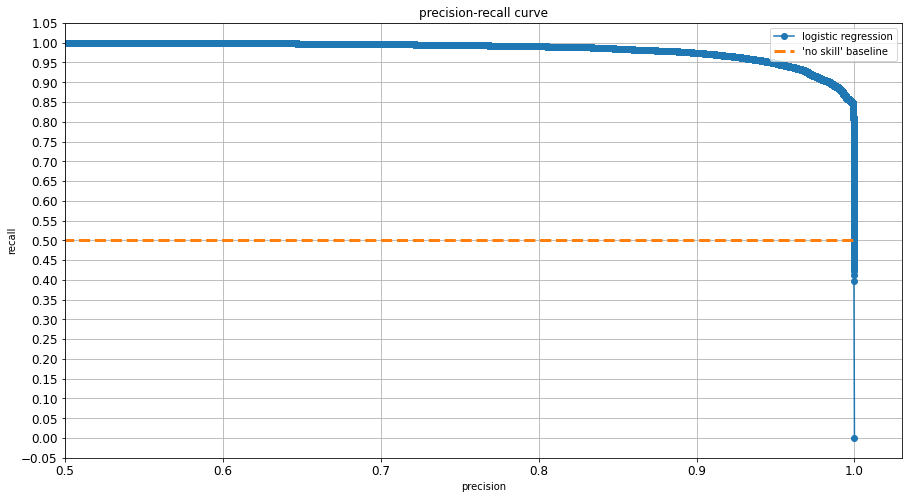

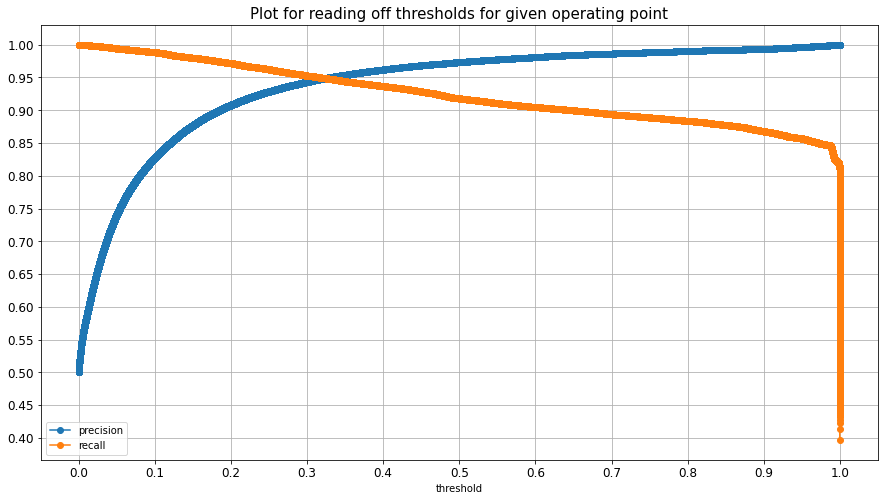

In [11]:
from matplotlib.ticker import MultipleLocator # just to make the plot more beautiful
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(precision, recall, '-o', label="logistic regression") # IMPORTANT
positive_fraction = np.sum(y_res == 1) / len(y_res)
plt.plot([0,1], [positive_fraction, positive_fraction], '--', lw=3, label="'no skill' baseline")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend()
plt.grid(which='both')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.tick_params(axis='both', which='both', labelsize=12)
plt.title("precision-recall curve")
plt.xlim([0.5, 1.03])
plt.show()

print()
print()

# from the documentation:
# The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold.
# -> we need to drop the last precision and recall values in this plot
plt.figure(figsize=(15,8))
plt.plot(thresholds, precision[:-1], '-o', label="precision")
plt.plot(thresholds, recall[:-1], '-o', label="recall")
plt.xlabel("threshold")
plt.legend()
plt.grid(which='both')
plt.title("Plot for reading off thresholds for given operating point", size=15)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.tick_params(axis='both', which='both', labelsize=12)
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score

print("default threshold (0.5)")

print("train precision:", precision_score(y_res, logreg_sm.predict(X_res)))
print("train recall:   ", recall_score(y_res, logreg_sm.predict(X_res)))
print("test  precision:", precision_score(y_test, logreg_sm.predict(X_test)))
print("test  recall:   ", recall_score(y_test, logreg_sm.predict(X_test)), "\n")

threshold = 0.2

print(f"custom threshold ({threshold})")
print("train precision:", precision_score(y_res, logreg_sm.predict_proba(X_res)[:,1] > threshold))
print("train recall:   ", recall_score(y_res, logreg_sm.predict_proba(X_res)[:,1] > threshold))
print("test  precision:", precision_score(y_test, logreg_sm.predict_proba(X_test)[:, 1] > threshold))
print("test  recall:   ", recall_score(y_test, logreg_sm.predict_proba(X_test)[:,1] > threshold))


default threshold (0.5)
train precision: 0.9733271050782523
train recall:    0.9180263533000863
test  precision: 0.059431524547803614
test  recall:    0.92 

custom threshold (0.2)
train precision: 0.9080378643195217
train recall:    0.9716881587862228
test  precision: 0.015961138098542677
test  recall:    0.92


### Area under the Curve: AUC

In [13]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Without SMOTE
print("train AUC:", roc_auc_score(y_train, logreg.predict(X_train)))
print("test AUC: ", roc_auc_score(y_test, logreg.predict(X_test)), "\n")

# With SMOTE
print("train AUC:", roc_auc_score(y_res, logreg_sm.predict(X_res)))
print("test AUC: ", roc_auc_score(y_test, logreg_sm.predict(X_test)))

train AUC: 0.8114928245875236
test AUC:  0.8198944850872257 

train AUC: 0.9464344555144596
test AUC:  0.9471975239167135


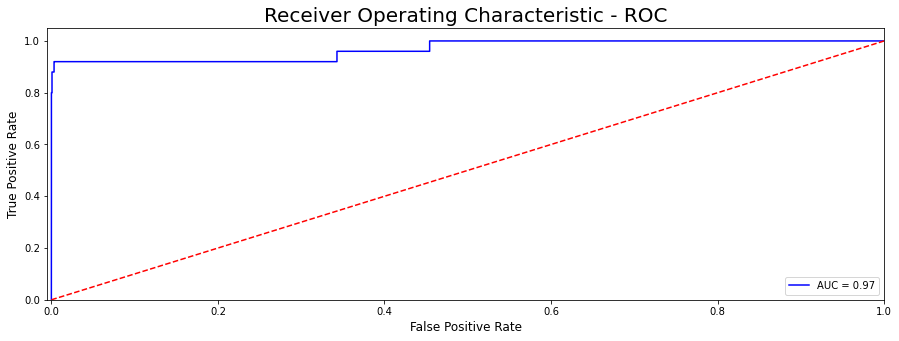

In [14]:
preds_sm = logreg_sm.predict_proba(X_test)[:,1] #Proba for positives
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_sm, pos_label=1)
roc_auc = metrics.auc(fpr, tpr) #specificity, sensitivity/recall

plt.figure(figsize=(15,5))
plt.plot(fpr, tpr, 'b', label='AUC = %.2f' %roc_auc)
plt.title('Receiver Operating Characteristic - ROC', size=20)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.005, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.legend(loc='lower right')
plt.show()

### Confusion Matrix

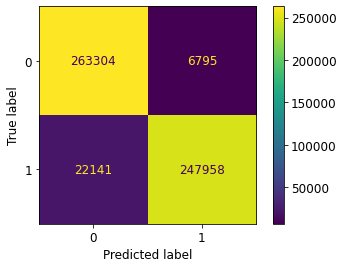

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

font = {'size' : 12}
plt.rc('font', **font)

y_pred = logreg_sm.predict(X_res)

cm = confusion_matrix(y_res, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(2)))
disp.plot()

plt.show()